# ----------------------------------MISSING DATA----------------------------------------

### Imports

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,neighbors

# ------------------------------------Loan Data--------------------------------------------

### Reading each CSV in a separate dataframe

In [64]:
d1 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3a_securev1.csv', header=1, skipfooter=4, engine='python')
d2 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3b_securev1.csv', header=1, skipfooter=4, engine='python')
d3 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3c_securev1.csv', header=1, skipfooter=4, engine='python')
d4 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3d_securev1.csv', header=1, skipfooter=4, engine='python')
d5 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q1.csv', header=1, skipfooter=4, engine='python')
d6 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q2.csv', header=1, skipfooter=4, engine='python')
d7 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q3.csv', header=1, skipfooter=4, engine='python')
d8 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q4.csv', header=1, skipfooter=4, engine='python')
d9 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q1.csv', header=1, skipfooter=4, engine='python')
d10 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q2.csv', header=1, skipfooter=4, engine='python')
d11 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q3.csv', header=1, skipfooter=4, engine='python')

### Concatenating all the CSVs in one dataframe

In [65]:
loan_data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10,d11])

In [66]:
loan_df = loan_data

In [67]:
loan_df.shape

(1646773, 151)

In [68]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

### Finding the missing data percentage and storing columns in features with mores than 70% data

In [69]:
missing_data = loan_df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/loan_data.shape[0])*100
missing_data.head()
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]
print('Number of columns after removing missing columns -',len(features))

Number of columns after removing missing columns - 93


In [70]:
loan_df = loan_df[features]

In [71]:
del loan_df['id']
loan_df = loan_df.reset_index()
loan_df['index'] = loan_df.index +1
loan_df=loan_df.rename(columns = {'index':'id'})

### Considering only the features that are relevant to analysis

In [75]:
f = ['id','debt_settlement_flag','application_type','fico_range_low','fico_range_high','emp_length','dti','annual_inc','grade','sub_grade','int_rate','loan_amnt','issue_d','purpose','addr_state','home_ownership','zip_code','policy_code','term']

In [76]:
loan_df= loan_df[f]

In [77]:
loan_df.shape

(1646773, 19)

In [78]:
loan_df = loan_df[loan_df.addr_state!='WV']
loan_df = loan_df[loan_df.addr_state!='IO']

In [79]:
loan_df.head()

,id,debt_settlement_flag,application_type,fico_range_low,fico_range_high,emp_length,dti,annual_inc,grade,sub_grade,int_rate,loan_amnt,issue_d,purpose,addr_state,home_ownership,zip_code,policy_code,term
0,1,N,Individual,735.0,739.0,10+ years,27.65,24000.0,B,B2,10.65%,5000.0,Dec-2011,credit_card,AZ,RENT,860xx,1.0,36 months
1,2,N,Individual,740.0,744.0,< 1 year,1.00,30000.0,C,C4,15.27%,2500.0,Dec-2011,car,GA,RENT,309xx,1.0,60 months
2,3,N,Individual,735.0,739.0,10+ years,8.72,12252.0,C,C5,15.96%,2400.0,Dec-2011,small_business,IL,RENT,606xx,1.0,36 months
3,4,N,Individual,690.0,694.0,10+ years,20.00,49200.0,C,C1,13.49%,10000.0,Dec-2011,other,CA,RENT,917xx,1.0,36 months
4,5,N,Individual,695.0,699.0,1 year,17.94,80000.0,B,B5,12.69%,3000.0,Dec-2011,other,OR,RENT,972xx,1.0,60 months


In [80]:
loan_df.isnull().sum()

id                        0
debt_settlement_flag      1
application_type          1
fico_range_low            1
fico_range_high           1
emp_length                1
dti                     358
annual_inc                5
grade                     1
sub_grade                 1
int_rate                  1
loan_amnt                 1
issue_d                   1
purpose                   1
addr_state                1
home_ownership            1
zip_code                  2
policy_code               1
term                      1
dtype: int64

In [81]:
loan_df = loan_df[loan_df.application_type.notnull()]

### Emp Length

In [82]:
loan_df['emp_length'].replace(to_replace='[^0-9]+', value='',inplace=True, regex=True)
loan_df.loc[loan_df.emp_length=='', ['emp_length']] = '0'
loan_df['emp_length'] = loan_df['emp_length'].astype(int)

### Zipcode

In [83]:
loan_df['zip_code'] = loan_df['zip_code'].astype(str).map(lambda x: x.rstrip('xx'))

In [84]:
z = loan_df[['zip_code', 'addr_state']][loan_df.addr_state=='AL'].groupby(['addr_state']).apply(pd.DataFrame.mode).reset_index(drop=True)['zip_code'][0]
z = int(z)

In [85]:
loan_df.loc[loan_df.zip_code=='nan', ['zip_code']] =z

In [33]:
loan_df['zip_code'] = loan_df['zip_code'].astype(int)

### Int Rate

In [87]:
loan_df['int_rate'] = loan_df['int_rate'].astype(str).map(lambda x: x.rstrip('%'))
loan_df['int_rate'] = loan_df['int_rate'].astype(float)

### Date

In [88]:
loan_df['Year'] = loan_df['issue_d'].astype(str).map(lambda x: int(x.split('-')[1]))
loan_df['Month'] = loan_df['issue_d'].astype(str).map(lambda x: x.split('-')[0])

In [89]:
lookup = {'Dec':12, 'Nov':11, 'Oct':10, 'Sep':9, 'Aug':8, 'Jul':7, 'Jun':6, 'May':5, 'Apr':4,'Mar':3, 'Feb':2, 'Jan':1}
loan_df['Month'] =  loan_df['Month'].apply(lambda x: lookup[x])

In [90]:
loan_df[['Year','Month']] = loan_df[['Year','Month']].astype(int)

In [91]:
# Annual Income
part = loan_df[['id','emp_length', 'annual_inc']]
Mode = loan_df['annual_inc'].mode()[0]
a = list(loan_df['emp_length'].unique())

for c in a:
    t = part[part.emp_length == c]
    if( t.annual_inc.isnull().sum()==0):
            break
    else:
            if(t.shape == t[t.isnull().any(axis=1)].shape ):
                t['annual_inc'].fillna(Mode, inplace=True)
            else:
                c = t['annual_inc'].mode()[0]
                t['annual_inc'].fillna(c, inplace=True)
            part.loc[part.Id.isin(t.id), ['annual_inc']] = t[['annual_inc']]
part['annual_inc'].fillna(part['annual_inc'].mode()[0], inplace = True)      
loan_df.loc[loan_df.id.isin(part.id), ['annual_inc']] = part[['annual_inc']]

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### dti

In [92]:
# dti
dti_t = loan_df[['dti', 'emp_length','id']]
Mode_dti = loan_df['dti'].mode()[0]
d = list(loan_df['emp_length'].unique())

for c in d:
    dt = dti_t[dti_t.emp_length == c]
    if( dt.dti.isnull().sum()==0):
            break
    else:
            if(dt.shape == dt[dt.isnull().any(axis=1)].shape ):
                dt['dti'].fillna(Mode_dti, inplace=True)
            else:
                c = dt['dti'].mode()[0]
                dt['dti'].fillna(c, inplace=True)
            dti_t.loc[dti_t.id.isin(dt.id), ['dti']] = dt[['dti']]
dti_t['dti'].fillna(dti_t['dti'].mode()[0], inplace = True)      
loan_df.loc[loan_df.id.isin(dti_t.id), ['dti']] = dti_t[['dti']]

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Fico columns

In [93]:
loan_df['fico_avg'] = (loan_df['fico_range_high']+loan_df['fico_range_low'])/2

In [100]:
loan_df.shape

(1641127, 22)

In [99]:
loan_df = loan_df[loan_df.fico_avg > 660]

In [101]:
loan_df[['grade','sub_grade','application_type','addr_state','purpose','home_ownership']]= loan_df[['grade','sub_grade','application_type','addr_state','purpose','home_ownership']].astype(str)

In [102]:
loan_df.isnull().sum()

id                      0
debt_settlement_flag    0
application_type        0
fico_range_low          0
fico_range_high         0
emp_length              0
dti                     0
annual_inc              0
grade                   0
sub_grade               0
int_rate                0
loan_amnt               0
issue_d                 0
purpose                 0
addr_state              0
home_ownership          0
zip_code                0
policy_code             0
term                    0
Year                    0
Month                   0
fico_avg                0
dtype: int64

### Exporting the cleaned data into a CSV

In [103]:
loan_df['approval'] =1
loan_df=loan_df.rename(columns = {'fico_avg':'risk_score'})
loan_df=loan_df.rename(columns = {'addr_state':'State'})

In [104]:
loan_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [105]:
loan_df.to_csv('/Users/sonalichaudhari/Desktop/Loan.csv')

In [107]:
loan_df.shape

(1641127, 23)

# END

In [127]:
main = pd.concat([decline, df])

In [128]:
main.shape

(17028377, 9)

In [129]:
decline.shape

(15504479, 8)

In [130]:
main['dti_joint'].isnull().sum()

15504479

In [131]:
main['dti']=main['dti'].astype(float)

In [132]:
main.dti_joint.describe()

count    1.523898e+06
mean     2.454835e-01
std      2.257649e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.949000e+01
Name: dti_joint, dtype: float64

In [133]:
#main.dti_joint.sort_values(ascending=False)

In [134]:
main['dti_joint'].fillna(0,inplace = True)

In [135]:
main.isnull().sum()

Id            0
Month         0
Year          0
approval      0
dti           0
dti_joint     0
emp_length    0
loan_amnt     0
risk-score    0
dtype: int64

In [136]:
main.head()

,Id,Month,Year,approval,dti,dti_joint,emp_length,loan_amnt,risk-score
0,1,5,2007,n,10.00,0.0,4,1000.0,693.0
1,2,5,2007,n,10.00,0.0,0,1000.0,703.0
2,3,5,2007,n,10.00,0.0,1,11000.0,715.0
3,4,5,2007,n,38.64,0.0,0,6000.0,698.0
4,5,5,2007,n,9.43,0.0,0,1500.0,509.0


In [143]:
main.loc[main.emp_length=='n/', ['emp_length']] = 0

In [154]:
main.columns

Index(['Id', 'Month', 'Year', 'approval', 'dti', 'dti_joint', 'emp_length',
       'loan_amnt', 'risk-score'],
      dtype='object')

In [152]:
main['approval'] = main['approval'].astype(int)

In [146]:
# y==1
# n ==0

In [147]:
main.loc[main.approval=='y', ['approval']] = 1

In [149]:
main.loc[main.approval=='n', ['approval']] = 0

In [155]:
yy = main['approval']
cols_to_keep = ['Month', 'Year','dti', 'dti_joint', 'emp_length','loan_amnt', 'risk-score']
XX = main[cols_to_keep]

In [157]:
yy = np.ravel(yy)

In [160]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, yy, random_state=0)

In [161]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [163]:
y_pred = model.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3795513   80530]
 [ 193358  187694]]


In [165]:
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


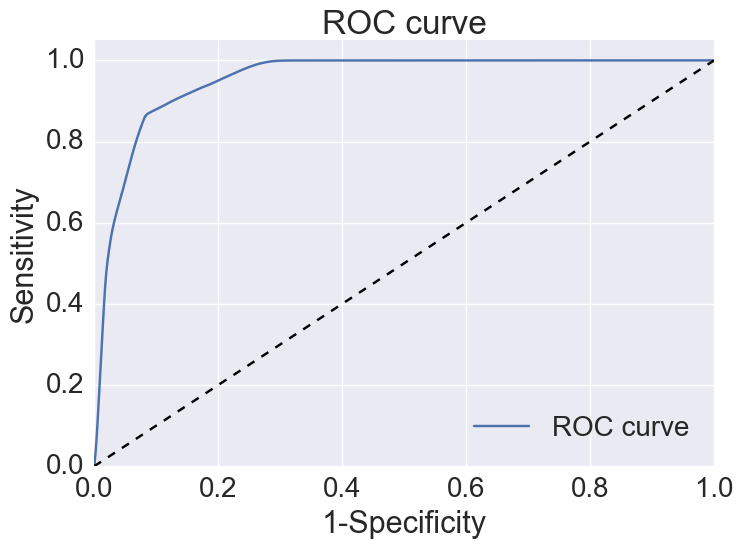

In [166]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Random

In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
%pylab inline
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
from sklearn.model_selection import GridSearchCV
import pickle

Populating the interactive namespace from numpy and matplotlib


/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [170]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3)
rf.fit(X_train, y_train)

KeyboardInterrupt: 